# Exercise 1

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Wednesday, 29/04/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**

During the course you will use Jupyter notebooks for the homework exercises and Python scripts for the projects. The focus of this exercise is how to work with notebooks and how to write a python script. You don't need to write any Python code by yourself. All codes are provided in the notebook itself and in additional materials. 

Put in here your group number: 

Group 12

# Before you start

In this first exercise you need some files, which are necessary for your solutions. You should find these files now in the same directory as the notebook:

 * `Bessel_Functions.pdf`  the PDF version of the example Jupyter notebook
 * `bessel_asymp1.py` the first code block
 * `bessel_asymp2.py` the second code block
 * `bessel_functions.png`  the image inside the notebook
 * `*.dat` several files with lists of moons orbiting planets (e.g. Saturn, Jupiter)
 
You can use the file browser to have a look at these files. You find all files of this exercise in *Exercise_1* in your home directory.

# 1. Create a Jupyter notebook (20 points)

In this first task you should recreate the notebook ```Bessel_Functions.ipynb```. You have a PDF version ```Bessel_Functions.pdf``` of this notebook in your directory. 

**Your tasks:**
 * recreate the ```Bessel_Functions``` notebook
 
**Hints:**
 * you can find a video tutorial series of how to work with the Jupyterlab environment including how to create Jupyter notebooks on [YouTube](https://www.youtube.com/playlist?list=PL0FqMC_xCtjRvXC1R55U5ufx0vxajpZqi)
 * the image in the notebook is in your directory
 * For the two code blocks you can create for each a code cell and use a Jupyter notebooks magic command. If you type this command: 
   ```
   %load bessel_asymp1.py
   ```
   into one cell and execute the cell, the content of *bessel_asymp1.py* will be loaded into the code cell! Do this equally for *bessel_asymp2.py*!

# 2. Create a Python script (20 points)

There are two different possibilities to write Python programs. One is to use jupyter notebooks to have a form of interactive program in which you can run a program cell after cell. The other way to write programs is to write scripts which can be run e.g. in a terminal. 

Let's have a look at the following exercise:


## Moons orbiting Saturn

In this exercise we want to test the third Kepler law 

The third kepler law is for a small body orbiting a large mass:

$$ \frac{T^2}{a^3} = C $$

where $T$ is the orbital period and $a$ the semi-major axis of the orbit. For all bodies orbiting a mass $M$ $C$ is constant and can be written as:

$$C \approx \frac{4\pi^2}{G\cdot M}$$

with the gravitational constant $G=6.67408 × 10^{-11} m^3 kg^{-1} s^{-2}$.


The task is now to write a python program in the Jupyterlab environment which first prove the third kepler law and then calculate the Mass $M$ of Saturn using the orbital data of the moons around Saturn. The program should calculate the mass for all moons infividually and then for the final mass make use of the mean and standard deviation of all values.

The file with the orbital data is stored in the same directory of this notebook and it is named  *Saturn.dat*. It has a table with 4 columns, the name, the planet the moon is surrounding (Saturn), the semi-major axis (in km) and the orbital period (in days). Only the last 2 columns of the table are important for this program.


## a) The solution in a Jupyter Notebook
First we describe how the solution can be implemented in a jupyter notebook. Please go through all the code cells and individually execute a cell by pressing *Shift-Return*.

We need to load the data from *Saturn.dat*. Before we start we need to load all necessary modules:

In [1]:
# this is only necessary for jupyter notebooks
%matplotlib inline                

import numpy as np                # module for math arrays
import matplotlib.pyplot as plt   # module for plotting

Then load the data into the memory, omit the first 2 columns. Then seperate the columns and calculate the values
into meters and seconds.

In [2]:
data = np.loadtxt('Saturn.dat', usecols=[2,3])

# seperate data
saxis = data[:,0] * 1000         # semi major axis in meter
torb  = data[:,1] * 24 * 60 * 60 # orbital period in seconds

The matplotlib provides a simple scatter plot tool which we use to draw the data in the scheme of the third kepler law.You will learn more parameter for the plots in the lecture:

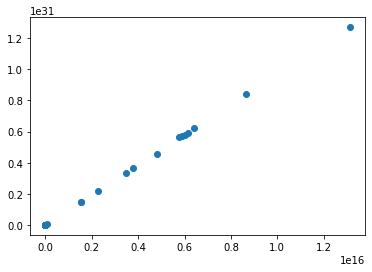

In [3]:
plt.scatter(torb**2, saxis**3)   # plot T^2 against a^3

As you can see, the data points are lying on a straight line which indicated, that the third kepler law is prooved with these moons.

Now we calculate the kepler constant $C$. In this case we can use the arrays directly in our calculations:

In [4]:
# calculate the mass

# calculate the kepler constant for all moons
c = torb**2/saxis**3             # we can use the arrays directly

Using the formular for the mass $M$ we can calculate the masses:

In [5]:
g = 6.67408e-11                  # the gravitational constant in m^3 kg^-1 s^-2

m = 4*(np.pi**2)/(g*c)           # calculate the mass for all moons


Finally we can print the results. For all arrays your have a *.mean()* and a *.std()* function which calculates the mean value and its standard deviation:

In [6]:
m = m / 1e26                     # downscale for printing
print('M =', m.mean(), ' +/-', m.std(), ' 10^26 kg')

M = 5.629853444338598  +/- 0.38072136278234225  10^26 kg


## b) The solution in a  Python script

To write the same program in a Python script, you need to copy the code from the code cells into a textfile which should be named e.g. *planets_group_XXX.py* (replace XXX with your group number). As shown in the video tutorials you can drag and drop the content of the cells directly into an open text file in the jupyterlab environment. Please do not copy this line:
```Python
%matplotlib inline
```
This is a magic command (starting with a `%`) and only working in Jupyter notebooks. In Python scripts this line generates an error.

When the script is finished you can open a terminal and change to the directory in which your Python textfile is. The you can run the command:

```
python3 planets_group_XXX.py
```

You will see the output of the scipt in the terminal which shows you the calculated mass of Saturn. Unfortunately the plot is not shown.

## c) Running the Python script with arguments

One big advantage of Python scripts is that we can use scripts not only for specific problems but also in the context of batch processing which means using the same script on different files or data sets. In this program we are using the file *Saturn.txt*. In the directory we have similar files for other planets, e.g. Jupiter, Neptun, Uranus. You probably know from several Unix/Linux commands that you can pass filenames as parameters to commands. This is also possible for Python scripts. There is a special module called *sys* which provides a list of command line arguments *sys.argv* which we can use to read the file the script has to use!

To modify the existing Python script to accept command line parameters, replace this line:

```Python
data = np.loadtxt('Saturn.dat', usecols=[2,3])
```

with:
```Python
import sys      # for accessing the command line parameters

data = np.loadtxt(sys.argv[1], usecols=[2,3])
```

Now you can run the program with:
```
python3 planets_group_XXX.py Saturn.dat
```
or
```
python3 planets_group_XXX.py Jupiter.dat
```

## Your tasks

 * create a Python script *planets_group_XXX.py* (replace XXX with your group number!) in the jupyterlab editor. Copy the existing cells of the Jupyter notebook solution above with drag and drop into the script file.
 * open a terminal and run your program with *python3 planets_group_XXX.py* 
 * modify your program for the usage of arguments and test the program for the planets Jupiter, Saturn and Uranus.
 * submit the script via eCampus
 
**Hints:**
 * Do not copy this line:
   ```Python
   %matplotlib inline
   ```
   This code line is magic command (starting with %). Magic commands are only working in jupyter notebooks. Using this commands in scripts will give you an error!
 * One difference between the ipython consle and the terminal is that in the terminal no graphical output will be generated!